# Install pandas and networkx libraries

📖 [Install pandas library](https://pandas.pydata.org/docs/getting_started/install.html)
```bash
pip install pandas
```

📖 [Install networkx library](https://networkx.org/documentation/stable/install.html)
```bash
pip install networkx
```

Now let's import these libraries.

In [6]:
import numpy as np
import pandas as pd
import networkx as nx

# Network modeling with NetworkX

[NetworkX](https://networkx.org/) is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

It provides:

- tools for the study of the structure and dynamics of social, biological, and infrastructure networks;

- a standard programming interface and graph implementation that is suitable for many applications;

- a rapid development environment for collaborative, multidisciplinary projects;

- an interface to existing numerical algorithms and code written in C, C++, and FORTRAN; and

- the ability to painlessly work with large nonstandard data sets.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

## Creating a Graph

In [3]:
G = nx.Graph()
G

The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we’ll look at simple manipulations. You can add one node at a time

In [4]:
G.add_node(1)

or add nodes from any iterable container, such as a list

In [5]:
G.add_nodes_from([2, 3])

In [6]:
G.number_of_nodes()

3

You can also add nodes along with node attributes if your container yields 2-tuples of the form (node, node_attribute_dict)

In [7]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

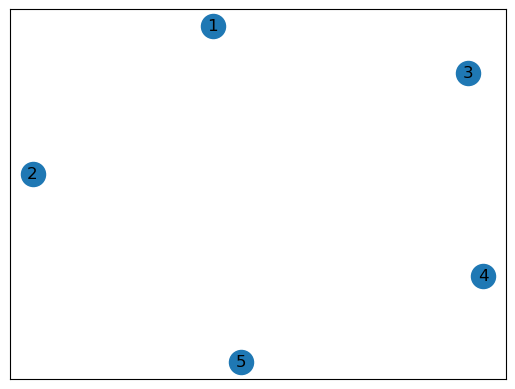

In [8]:
nx.draw_networkx(G)

In [9]:
for node in G.nodes.data():
    print(node)

(1, {})
(2, {})
(3, {})
(4, {'color': 'red'})
(5, {'color': 'green'})


Nodes from one graph can be incorporated into another

In [10]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [11]:
G.number_of_nodes()

10

G now contains the nodes of H as nodes of G. In contrast, you could use the graph H as a node in G

In [15]:
G.add_node(H)

G can also be grown by adding one edge at a time

In [12]:
G.add_edge(3, 11)

In [13]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple with "*"

by adding a list of edges

In [14]:
G.add_edges_from([(1, 2), (1, 3)])

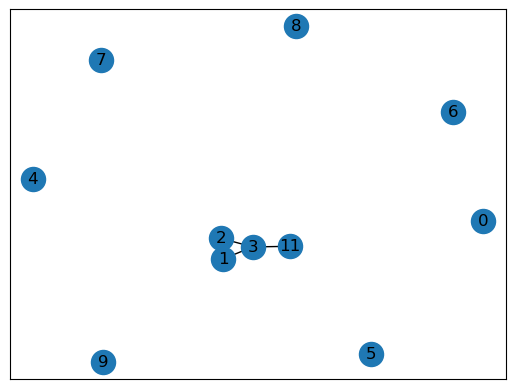

In [15]:
nx.draw_networkx(G)

## Examining elements of a graph

We can examine the nodes and edges. Four basic graph properties facilitate reporting:
```bash
G.nodes
G.edges
G.adj
G.degree
```

These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a graph. They offer a continually updated read-only view into the graph structure. They are also dict-like in that you can look up node and edge data attributes via the views and iterate with data attributes using methods .items(), .data(). If you want a specific container type instead of a view, you can specify one. Here we use lists, though sets, dicts, tuples and other containers may be better in other contexts.

In [17]:
list(G.nodes)

[1, 2, 3, 4, 5, 0, 6, 7, 8, 9, 11]

In [18]:
list(G.edges)

[(1, 2), (1, 3), (2, 3), (3, 11)]

In [19]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [20]:
G.degree[1]  # the number of edges incident to 1

2

## Accessing edges and neighbors

In addition to the views Graph.edges, and Graph.adj, access to edges and neighbors is possible using subscript notation.

In [21]:
# create a graph from edge list
G = nx.Graph([(1, 2, {"color": "yellow"}),
              (3, 4, {"color": "red"}),
              (1, 4, {"color": "blue"})
             ])

In [22]:
G[1]  # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}, 4: {'color': 'blue'}})

In [23]:
G[1][2] # checking the attribute of the neighbor

{'color': 'yellow'}

You can get/set the attributes of an edge using subscript notation if the edge already exists.

In [25]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

Convenient access to all edges is achieved with the edges property.

In [26]:
# Get all edge attributes for a specific attribute name
weights = nx.get_edge_attributes(G, 'color')
print(weights)

{(1, 2): 'red', (1, 4): 'blue', (1, 3): 'blue', (3, 4): 'red'}


## Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.nodes, and G.edges for a graph G

Assign graph attributes when creating a new graph

In [27]:
G = nx.Graph(day="Friday")

In [33]:
G.graph

{'day': 'Monday'}

Or you can modify attributes later

In [34]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

### Node attributes

Add node attributes using add_node(), add_nodes_from(), or G.nodes

In [35]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[3]

{'time': '2pm'}

In [37]:
G.nodes[1]['length'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714, 'length': 714}, 3: {'time': '2pm'}})

Note that adding a node to G.nodes does not add it to the graph, use G.add_node() to add new nodes. Similarly for edges.

### Edge attributes

Add/change edge attributes using add_edge(), add_edges_from(), or subscript notation.

In [38]:
G.add_edge(1, 2, weight=4.7)

G.add_edges_from([(3, 4), (4, 5)], color='red')

G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

G[1][2]['weight'] = 4.7

G.edges[3, 4]['weight'] = 4.2

## Reading a graph stored in a file using common graph formats

NetworkX supports many popular formats, such as edge lists, adjacency lists, GML, GraphML, LEDA and others.

In [26]:
red = nx.random_lobster(100, 0.9, 0.9)
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

## Drawing graphs

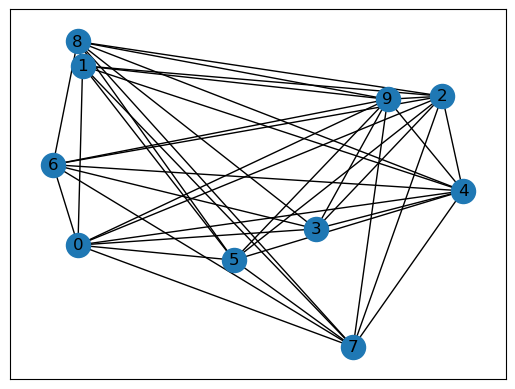

In [8]:
# importing matplotlib.pyplot
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(10, 0.8)
pos = nx.random_layout(G)
nx.draw_networkx(G, pos=pos)

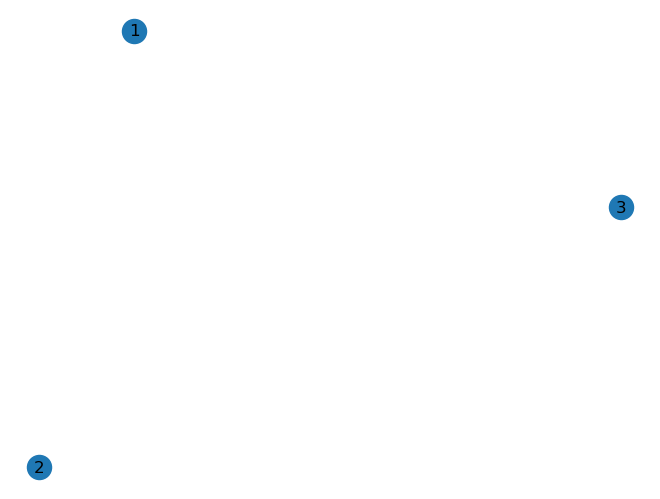

In [9]:
G=nx.Graph()
G.add_nodes_from([
    (1, {"color": "red"}),
    (2, {"color": "green"}),
    (3, {"color": "blue"}),
])
nx.draw(G, with_labels=True)

In [11]:
node_colors = []

for node in G.nodes(data=True):
    node_colors.append(node[1]['color'])

node_colors

['red', 'green', 'blue']

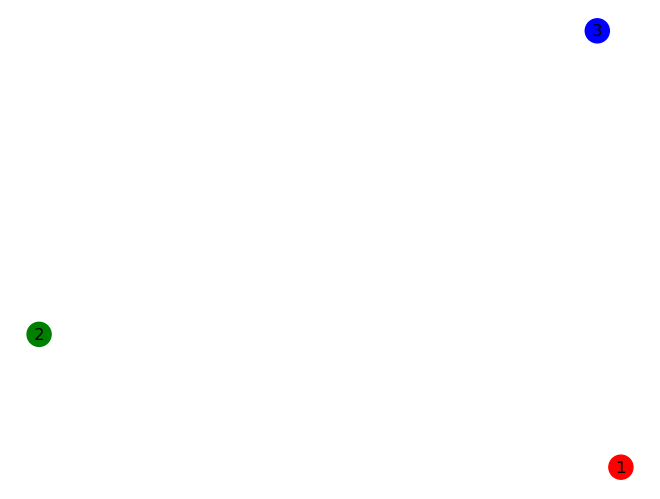

In [12]:
nx.draw(G, with_labels=True, node_color=node_colors)

In [13]:
G.add_edges_from([(1, 2), (2, 3)])
G[1][2]['color'] = "orange"
G[2][3]['color'] = "purple"

In [14]:
My_edge_colors_list = []
for edge in G.edges(data=True):
    My_edge_colors_list.append(edge[2]['color'])
My_edge_colors_list

['orange', 'purple']

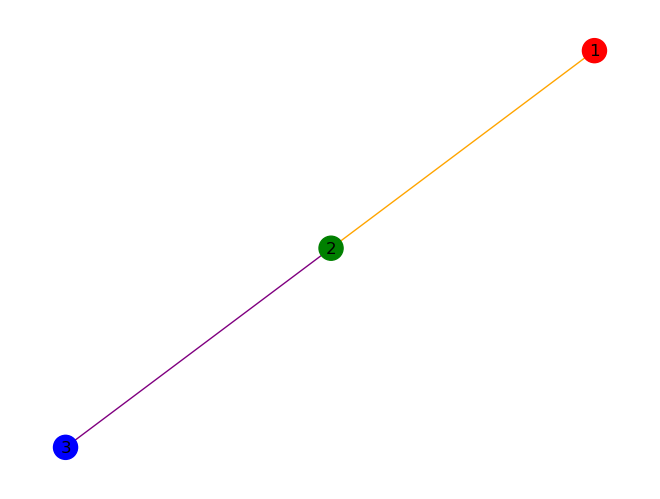

In [15]:
nx.draw(G, with_labels=True, node_color=node_colors, edge_color=My_edge_colors_list)

# Intro to OSMnx

OSMnx is a Python package to easily download, model, analyze, and visualize street networks and other geospatial features from OpenStreetMap. You can download and model walking, driving, or biking networks with a single line of code then analyze and visualize them. You can just as easily work with urban amenities/points of interest, building footprints, transit stops, elevation data, street orientations, speed/travel time, and routing.

📖 [Install osmnx](https://osmnx.readthedocs.io/en/stable/installation.html)
```bash
pip install osmnx
```

In [16]:
import osmnx as ox

Let's get the boundary polygon for Atlanta, project it, and plot it

The osmnx.geocoder.geocode_to_gdf() function retrieve OSM elements by place name or OSM ID with the Nominatim API.

If searching by place name, the query argument can be a string or structured dict, or a list of such strings/dicts to send to the geocoder. This uses the Nominatim “search” endpoint to geocode the place name to the best-matching OSM element, then returns that element and its attribute data.

In [4]:
atlanta = ox.geocode_to_gdf("Atlanta, Georgia, USA")
atlanta

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-84.55085 33.72241, -84.55084 ...",33.886823,33.647808,-84.28956,-84.550854,316157754,relation,119557,33.748992,-84.390264,boundary,administrative,16,0.742533,city,Atlanta,"Atlanta, Fulton County, Georgia, United States"


Now lets project to UTM

Documentation for ox.project_gdf can be found here: https://osmnx.readthedocs.io/en/stable/user-reference.html

>osmnx.projection.project_gdf(gdf, to_crs=None, to_latlong=False)

This function reproject a GeoDataFrame from its current CRS to another.
If to_latlong is True, this projects the GeoDataFrame to the coordinate reference system defined by settings.default_crs. Otherwise it projects it to the CRS defined by to_crs. If to_crs is None, it projects it to the CRS of an appropriate UTM zone given gdf’s bounds.

PARAMETERS:
gdf (geopandas.GeoDataFrame) – the GeoDataFrame to be projected
to_crs (string or pyproj.CRS) – if None, project to UTM zone in which gdf’s centroid lies, otherwise project to this CRS
to_latlong (bool) – if True, project to settings.default_crs and ignore to_crs

RETURNS:
gdf_proj – the projected GeoDataFrame

RETURN TYPE:
geopandas.GeoDataFrame

In [18]:
atlanta_proj = ox.project_gdf(atlanta, to_crs=32616) # Try and find out what crs has this EPSG code
atlanta_proj

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((726933.072 3734072.271, 726934...",33.886823,33.647808,-84.28956,-84.550854,316157754,relation,119557,33.748992,-84.390264,boundary,administrative,16,0.742533,city,Atlanta,"Atlanta, Fulton County, Georgia, United States"


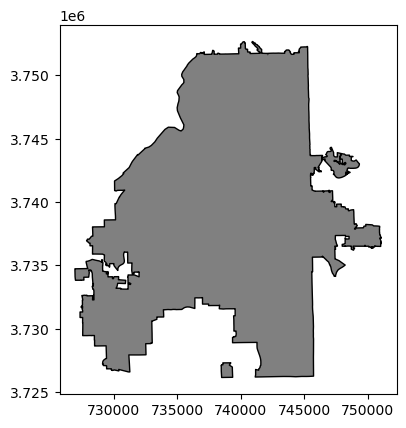

In [19]:
# Plot the city boundary
ax = atlanta_proj.plot(fc="gray", ec="black")

## Download and model street networks

OSMnx lets you download street network data and build topologically-corrected street networks, project and plot the networks, and save the street network as SVGs, GraphML files, or GeoPackages for later use. The street networks are directed and preserve one-way directionality. For a more in-depth demonstration of creating street networks, see this notebook.

You can download a street network by providing OSMnx any of the following (demonstrated in the examples below):

- a bounding box
- a lat-long point plus a distance
- an address plus a distance
- a place name or list of place names (to automatically geocode and get the boundary of)
- a polygon of the desired street network's boundaries
- a .osm formatted xml file

You can also specify several different network types:

- 'drive' - get drivable public streets (but not service roads)
- 'drive_service' - get drivable streets, including service roads
- 'walk' - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
- 'bike' - get all streets and paths that cyclists can use
- 'all' - download all non-private OSM streets and paths (this is the default network type unless you specify a different one)
- 'all_private' - download all OSM streets and paths, including private-access ones

Let's check the boundary shape for Atlanta again

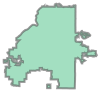

In [20]:
atlanta.iloc[0]['geometry']

Download the graph for the drive network in Atlanta.
This takes a while to finish running.
There are a total of 12794 nodes and 33372 edges.

In [21]:
G = ox.graph_from_polygon(atlanta.iloc[0]['geometry'],
                          network_type="drive")

Let's choose a smaller area for this demo.

In [22]:
# define a bounding box in Atlanta near the GT campus
north, south, east, west = 33.79, 33.75, -84.38, -84.41

In [23]:
# create network from that bounding box
G_box = ox.graph_from_bbox(north, south, east, west, network_type="drive")

/var/folders/mw/90tjblbd21x0d066xkhcl8xc0000gn/T/ipykernel_50710/4048677334.py:2: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G_box = ox.graph_from_bbox(north, south, east, west, network_type="drive")
/var/folders/mw/90tjblbd21x0d066xkhcl8xc0000gn/T/ipykernel_50710/4048677334.py:2: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G_box = ox.graph_from_bbox(north, south, east, west, network_type="drive")


Let's check the network that we have just extracted:

In [24]:
G_box.number_of_nodes()

847

In [25]:
G_box.number_of_edges()

2124

In [26]:
print(f'The graph has {G_box.number_of_nodes()} nodes and {G_box.number_of_edges()} edges')

The graph has 847 nodes and 2124 edges


## Save street networks

GeoPackages for GIS

In [ ]:
# save graph as a geopackage
ox.save_graph_geopackage(G, filepath="../Exercise/G_box.gpkg")

GraphML files for saving network and preserving topological detail

In [ ]:
# save/load graph as a graphml file: this is the best way to save your model
# for subsequent work later
filepath = "../Exercise/G_box.graphml"
ox.save_graphml(G_box, filepath)
G = ox.load_graphml(filepath)

# Dijkstra's algorithm

In [27]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
class Graph():

    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]

    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])

    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):

        # Initialize minimum distance for next node
        min_dist = 1e7

        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min_dist and sptSet[v] == False:
                min_dist = dist[v]
                min_index = v

        return min_index

    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):

        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V

        for cout in range(self.V):

            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)

            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True

            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                sptSet[v] == False and
                dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]

        self.printSolution(dist)


Vertex 	 Distance from Source
0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


In [29]:
# Driver program
g = Graph(9)
g.graph = [[0,  4, 0,  0,  0,  0, 0,  8, 0],
           [4,  0, 8,  0,  0,  0, 0, 11, 0],
           [0,  8, 0,  7,  0,  4, 0,  0, 2],
           [0,  0, 7,  0,  9, 14, 0,  0, 0],
           [0,  0, 0,  9,  0, 10, 0,  0, 0],
           [0,  0, 4, 14, 10,  0, 2,  0, 0],
           [0,  0, 0,  0,  0,  2, 0,  1, 6],
           [8, 11, 0,  0,  0,  0, 1,  0, 7],
           [0,  0, 2,  0,  0,  0, 6,  7, 0]
        ]

0 1 {'weight': 4}


{(0, 1): Text(-0.22595942576776568, 0.7637128582435497, '4'),
 (0, 7): Text(-0.4244815168655519, 0.7807894394755974, '8'),
 (1, 2): Text(0.08687636079679917, 0.26608076322999263, '8'),
 (1, 7): Text(-0.25638259671876973, 0.5445031206297237, '11'),
 (2, 3): Text(0.42621545414337203, -0.20712720063937862, '7'),
 (2, 5): Text(0.30406792444290054, -0.29518902552028825, '4'),
 (2, 8): Text(-0.16748013723062594, 0.04237015323964877, '2'),
 (3, 4): Text(0.6799603407637023, -0.6076556071355372, '9'),
 (3, 5): Text(0.498662342798772, -0.5070349700645488, '14'),
 (4, 5): Text(0.5578101613951032, -0.6957192590035071, '10'),
 (5, 6): Text(-0.059069830958377034, -0.47920796006436184, '2'),
 (6, 7): Text(-0.4747802521693031, 0.09912681971742954, '1'),
 (6, 8): Text(-0.5306197144705896, -0.14164363375834266, '6'),
 (7, 8): Text(-0.5107377034985755, 0.32080557159285794, '7')}

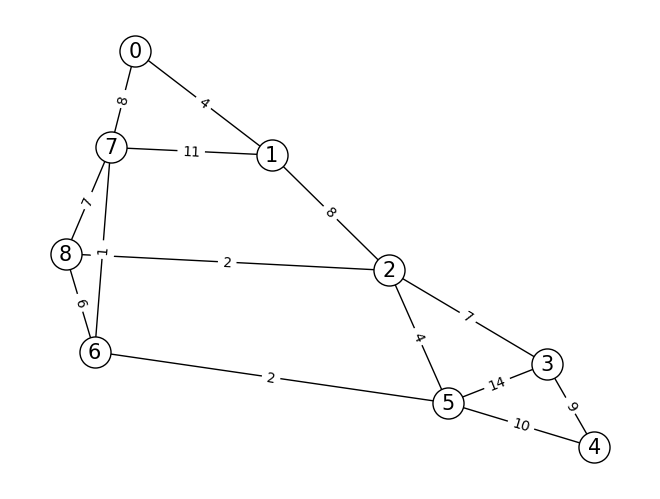

In [31]:
# Create graph from adjacency matrix
G = nx.from_numpy_array(np.matrix(g.graph))

# Check edge attributes
for u,v,data in G.edges.data():
    print(u, v, data)
    break

# Plot graph
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility
# Get edge labels
edge_labels = nx.get_edge_attributes(G, "weight")

# Parse paramaters though a dictionary
options = {
    "font_size": 15,
    "node_size": 500,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}
nx.draw(G, pos, with_labels=True, **options)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [32]:
g.dijkstra(0)

Vertex 	 Distance from Source
0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


The NetworkX library provides many functions that allows us to compute shortest paths in directed and undirected graphs. Check the documentation page below and explore on your own!

📖 [NetworkX-shortest paths](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html)

# Isochrone Maps

An isochrone map is a visual representation of which areas you can reach within a given time or distance.

In most locations, all directions cannot be traversed equally. Two endpoints may be five miles from a starting location, but one could take much longer to travel to. This is due to factors outside of simple distance, including geography, traffic, and routes available to specific modes of transport (e.g. train lines, bike paths, ski slopes).

Isochrone maps calculate these factors to identify what areas can be reached within a certain time limit, allowing businesses or individuals to accurately account for commutes, delivery times, or other essential travel metrics.

<img src="https://astro-geo-gis.com/wp-content/uploads/2019/07/Targomo.webp" alt="iso" title="isochorne map" width="600">

How far can you travel on foot in 15 minutes?

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon
import os
import pickle

%matplotlib inline
ox.__version__

'1.9.4'

In [35]:
# configure the place, network type, trip times, and travel speed

# define a bounding box
bbox = [33.86,-84.40,33.82,-84.34]

# specify a place name
place = {"city": "Athens", "state": "Georgia"}

# specify network type
network_type = "walk"

# specify travel time thresholds in minutes
trip_times = [5, 10, 15, 20, 25]  # in minutes

# specify travel speed
travel_speed = 4.5  # walking speed in km/hour

In [36]:
# download the street network using bounding box
G = ox.graph_from_bbox(north=33.86, south=33.84, east=-84.36, west=-84.40, network_type=network_type)

/var/folders/mw/90tjblbd21x0d066xkhcl8xc0000gn/T/ipykernel_50710/2957741226.py:2: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north=33.86, south=33.84, east=-84.36, west=-84.40, network_type=network_type)
/var/folders/mw/90tjblbd21x0d066xkhcl8xc0000gn/T/ipykernel_50710/2957741226.py:2: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(north=33.86, south=33.84, east=-84.36, west=-84.40, network_type=network_type)


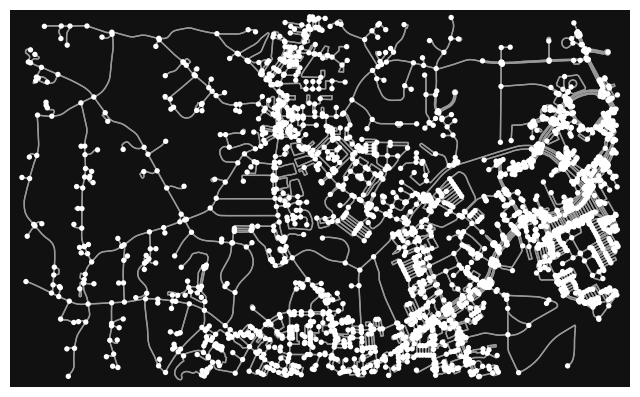

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [38]:
# Draw the graph
ox.plot_graph(G)

In [39]:
# find the centermost node
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes["geometry"].unary_union.centroid.xy
center_node = ox.nearest_nodes(G, x[0], y[0])

# Project graph to UTM
G = ox.project_graph(G)

In [40]:
# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute

for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute

Let's take a look at the attributes for the edges in the graph

In [41]:
for i, j, data in G.edges.data():
    print(i, j, data)
    break

69113686 5424306281 {'osmid': 9235538, 'highway': 'residential', 'oneway': False, 'reversed': False, 'length': 47.558, 'time': 0.6341066666666667}


Plot nodes you can reach on foot within each time threshold:

How far can you walk in 5, 10, 15, 20, and 25 minutes from the origin node? We'll use NetworkX to induce a subgraph of G within each distance, based on trip time and travel speed.

/var/folders/mw/90tjblbd21x0d066xkhcl8xc0000gn/T/ipykernel_50710/2687417906.py:2: FutureWarning: The `return_hex` parameter has been deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="viridis", start=0, return_hex=True)


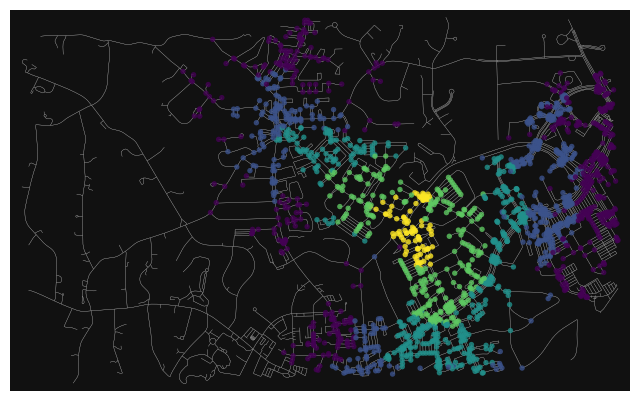

In [43]:
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="viridis", start=0, return_hex=True)

# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color
        
nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)